In [1]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
d1 = pd.read_csv("../results/results_combined_1.csv", index_col=0)
d2 = pd.read_csv("../results/results_combined_4.csv", index_col=0)

In [3]:
d1.replace("MMDAW", "MMDEW", inplace=True)
d2.replace("MMDAW", "MMDEW", inplace=True)
d1.replace("NewMA", "NEWMA", inplace=True)
d2.replace("NewMA", "NEWMA", inplace=True)

In [4]:
d2.loc[d2["dataset"] == "MNIST", "mean_until_detection" ] /= 7000
d2.loc[d2["dataset"] == "CIF", "mean_until_detection" ] /= 6000
d2.loc[d2["dataset"] == "FMNIST", "mean_until_detection" ] /= 7000
d2.loc[d2["dataset"] == "Gas", "mean_until_detection" ] /= 1159
d2.loc[d2["dataset"] == "HAR", "mean_until_detection" ] /= 858
d2.loc[d2["dataset"] == "Traf", "mean_until_detection" ] /= 40

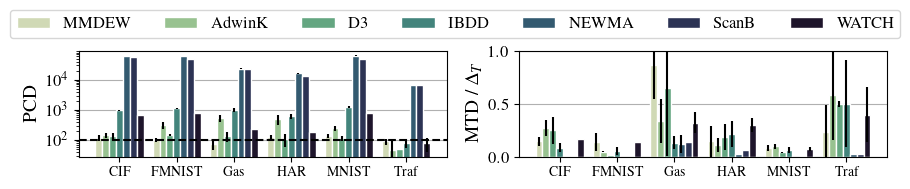

In [5]:
fig, (ax11,ax12) = plt.subplots(1,2,figsize=(9,1.7),sharex=True,sharey=False)

def p(data,y,ax):
    bar_width = .12 #.18
    group_idx = np.arange(6) # number of datasets
    algorithms = ["MMDEW", "AdwinK", "D3", "IBDD", "NEWMA", "ScanB", "WATCH"]
    cs = sns.cubehelix_palette(7, start=0.5, rot=-.75, gamma=1.2)
    ax.grid(visible=None, axis="y")
    for i, a in enumerate(algorithms):
        x_vals = group_idx + i * bar_width
        y_vals =  data[data.algorithm == a].groupby("dataset")[y].mean()
        err = data[data.algorithm == a].groupby("dataset")[y].std()
        ax.bar(x_vals, y_vals, width = bar_width, edgecolor ='white', label = a, color = cs[i])
        ax.errorbar(x_vals, y_vals, yerr = err, fmt="none", ecolor="black")


        #ax.set_ylim((0,1))
        ax.set_xticks([r + bar_width * 3 for r in group_idx], data.dataset.unique())
        ax.set_axisbelow(True)
        
p(data=d1, y="percent_changes_detected_y", ax=ax11)
p(data=d2, y="mean_until_detection", ax=ax12)

ax11.axhline(100,linestyle="--",color="black")

ax11.set_ylabel("PCD")
ax11.set_yscale('log')

ax12.set_ylabel("MTD / $\\Delta_T$")
ax12.set_ylim((0,1))

Line, Label = ax11.get_legend_handles_labels()
fig.legend(Line, Label, loc="upper center", bbox_to_anchor=(0.5, 1.15), ncol=7)
plt.tight_layout()
plt.savefig("../article/figures/percent_changes_detected.pdf", bbox_inches='tight')
plt.show()